# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga. 

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais. 

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


In [1]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dados_path = './Recrutamento.xlsx'

dados = pd.read_excel(dados_path)

In [3]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Dtypes ok!

Salary possui valores nulos referentes aos candidatos que não foram contratados (salary = 0)

Gender, workex e status devem ser convertidas para 0 e 1

In [5]:
dados.salary.fillna(0, inplace=True)

In [6]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
dados.groupby('status').describe().T

status                  No            Yes
sl_no    count   67.000000     148.000000
         mean   110.477612     106.878378
         std     65.859667      60.682502
         min      4.000000       1.000000
         25%     48.500000      57.750000
         50%    107.000000     108.500000
         75%    170.500000     153.250000
         max    215.000000     214.000000
ssc_p    count   67.000000     148.000000
         mean    57.544030      71.721486
         std      8.394246       8.715445
         min     40.890000      49.000000
         25%     52.000000      65.000000
         50%     56.280000      72.500000
         75%     63.000000      78.125000
         max     77.800000      89.400000
hsc_p    count   67.000000     148.000000
         mean    58.395522      69.926554
         std      9.914090       9.329268
         min     37.000000      50.830000
         25%     51.000000      63.000000
         50%     60.330000      68.000000
         75%     64.000000      75.250000
         max     82.000000      97.700000
degree_p count   67.000000     148.000000
         mean    61.134179      68.740541
         std      6.365825       6.518087
         min     50.000000      56.000000
         25%     57.000000      65.000000
         50%     61.000000      68.000000
         75%     65.000000      72.422500
         max     79.000000      91.000000
etest_p  count   67.000000     148.000000
         mean    69.587910      73.238041
         std     11.930687      13.729333
         min     50.000000      50.000000
         25%     60.000000      60.000000
         50%     67.000000      72.000000
         75%     76.500000      85.000000
         max     97.000000      98.000000
mba_p    count   67.000000     148.000000
         mean    61.612836      62.579392
         std      5.705689       5.884583
         min     51.210000      52.380000
         25%     58.480000      57.772500
         50%     60.690000      62.245000
         75%     65.405000      66.760000
         max     75.710000      77.890000
salary   count   67.000000     148.000000
         mean     0.000000  288655.405405
         std      0.000000   93457.452420
         min      0.000000  200000.000000
         25%      0.000000  240000.000000
         50%      0.000000  265000.000000
         75%      0.000000  300000.000000
         max      0.000000  940000.000000

No geral, os candidatos que foram contratados possuem pontuações maiores em todos os níveis escolares.

Variável salário poderá ser descartada, pois só se aplica aos candidatos que foram contratados

<AxesSubplot:xlabel='status', ylabel='count'>

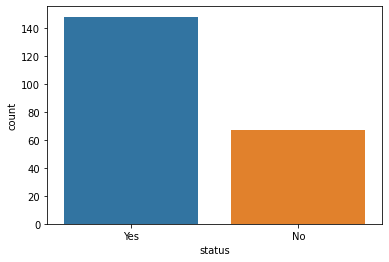

In [8]:
sns.countplot(data=dados, x='status')

In [9]:
dados.status.value_counts()

Yes    148
No      67
Name: status, dtype: int64

Há desequilibrio nas amostras.

# Analisando váriáveis numéricas

## hsc_p

<AxesSubplot:xlabel='hsc_p', ylabel='status'>

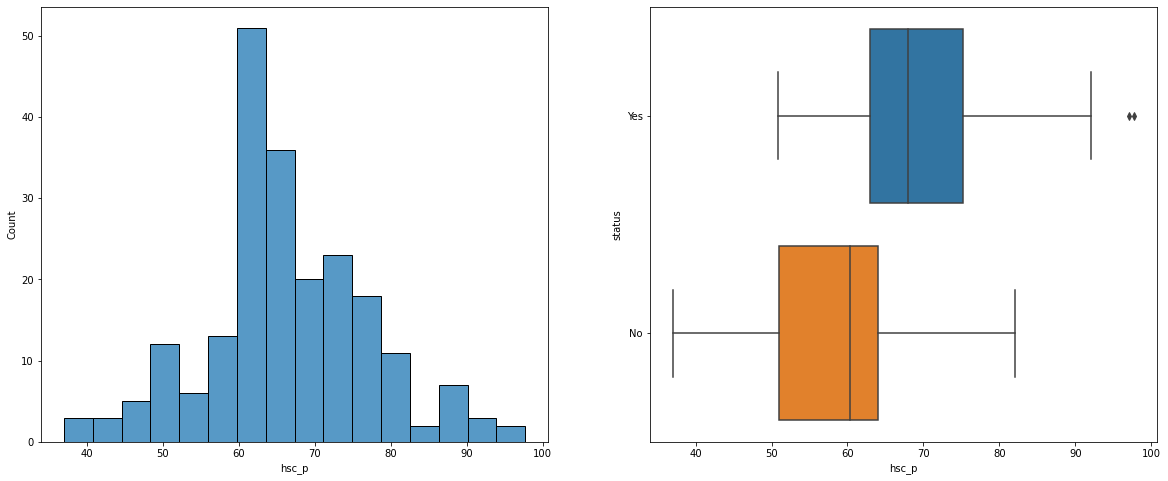

In [10]:
fig,ax = plt.subplots(ncols=2, figsize=(20, 8))

sns.histplot(data=dados, x='hsc_p', ax=ax[0])

sns.boxplot(data=dados, x='hsc_p', y='status', ax=ax[1])

## degree_p

<AxesSubplot:xlabel='degree_p', ylabel='status'>

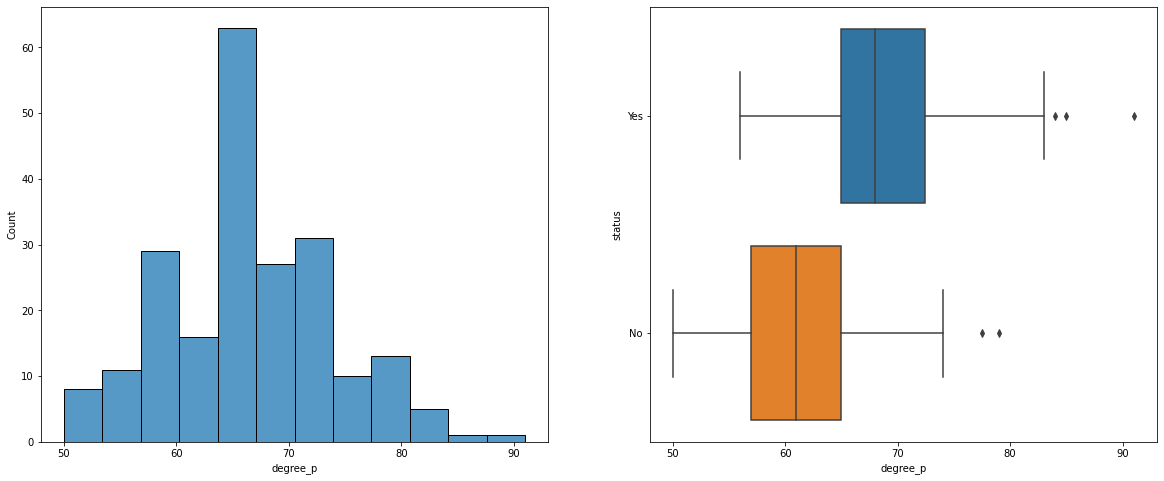

In [11]:
fig,ax = plt.subplots(ncols=2, figsize=(20, 8))

sns.histplot(data=dados, x='degree_p', ax=ax[0])

sns.boxplot(data=dados, x='degree_p', y='status', ax=ax[1])

## etest_p

<AxesSubplot:xlabel='etest_p', ylabel='status'>

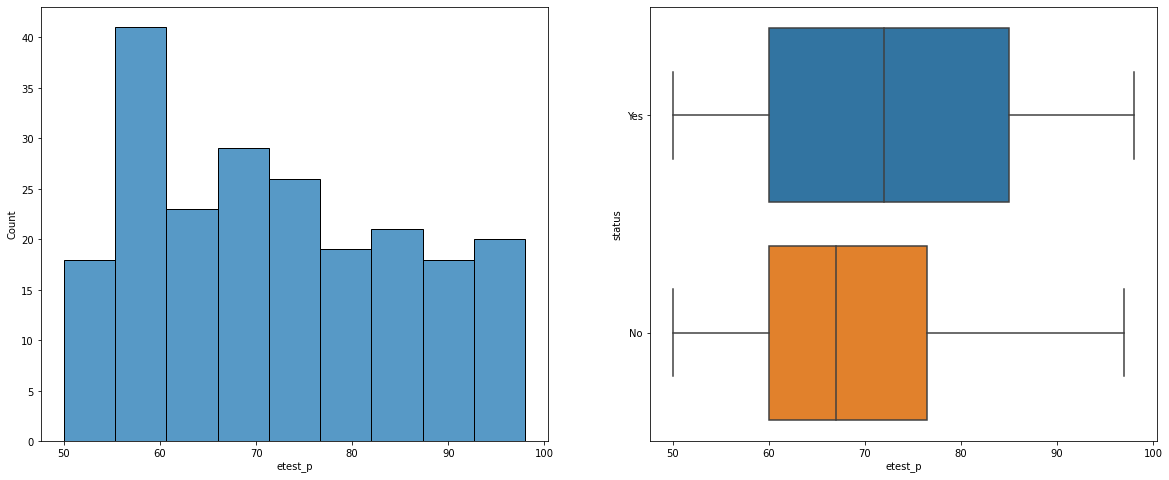

In [12]:
fig,ax = plt.subplots(ncols=2, figsize=(20, 8))

sns.histplot(data=dados, x='etest_p', ax=ax[0])

sns.boxplot(data=dados, x='etest_p', y='status', ax=ax[1])

Variável com distribuição um pouco mais uniforme, diferença pequena entre os candidatos contratados e não contratados

## mba_p

<AxesSubplot:xlabel='mba_p', ylabel='status'>

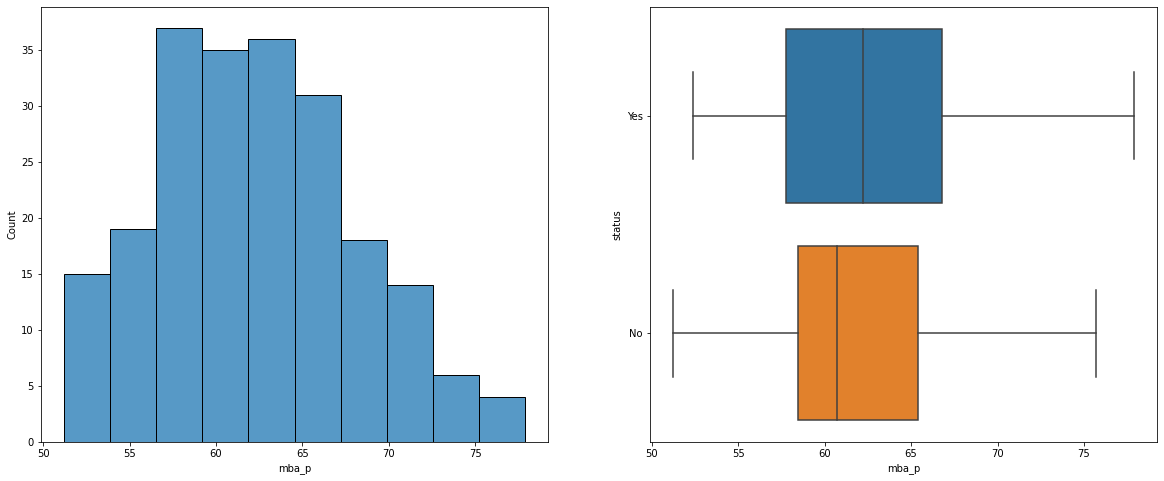

In [13]:
fig,ax = plt.subplots(ncols=2, figsize=(20, 8))

sns.histplot(data=dados, x='mba_p', ax=ax[0])

sns.boxplot(data=dados, x='mba_p', y='status', ax=ax[1])

Variável com distribuição um pouco mais uniforme, diferença pequena entre os candidatos contratados e não contratados

## salary

<AxesSubplot:xlabel='salary', ylabel='status'>

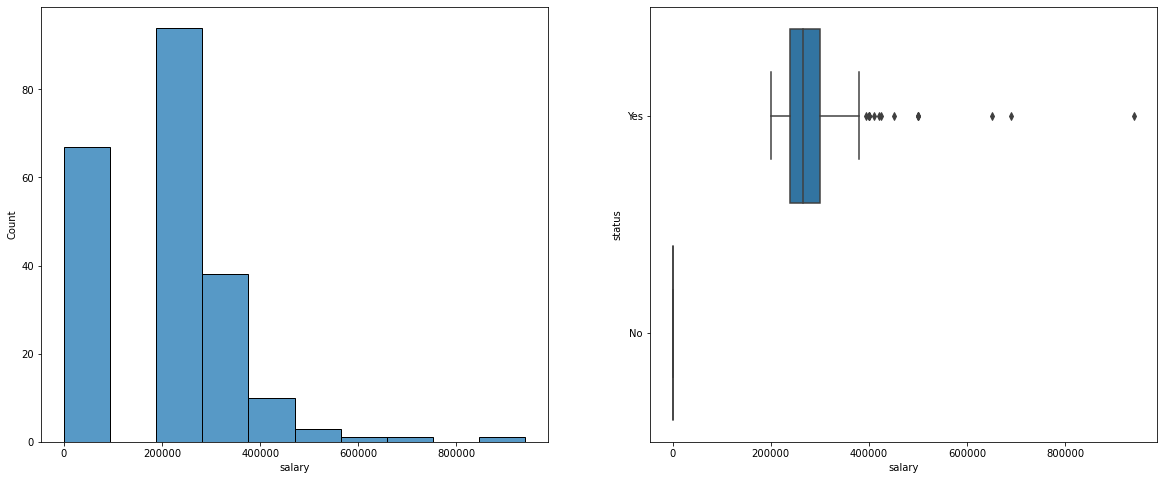

In [14]:
fig,ax = plt.subplots(ncols=2, figsize=(20, 8))

sns.histplot(data=dados, x='salary', ax=ax[0])

sns.boxplot(data=dados, x='salary', y='status', ax=ax[1])

## Geral

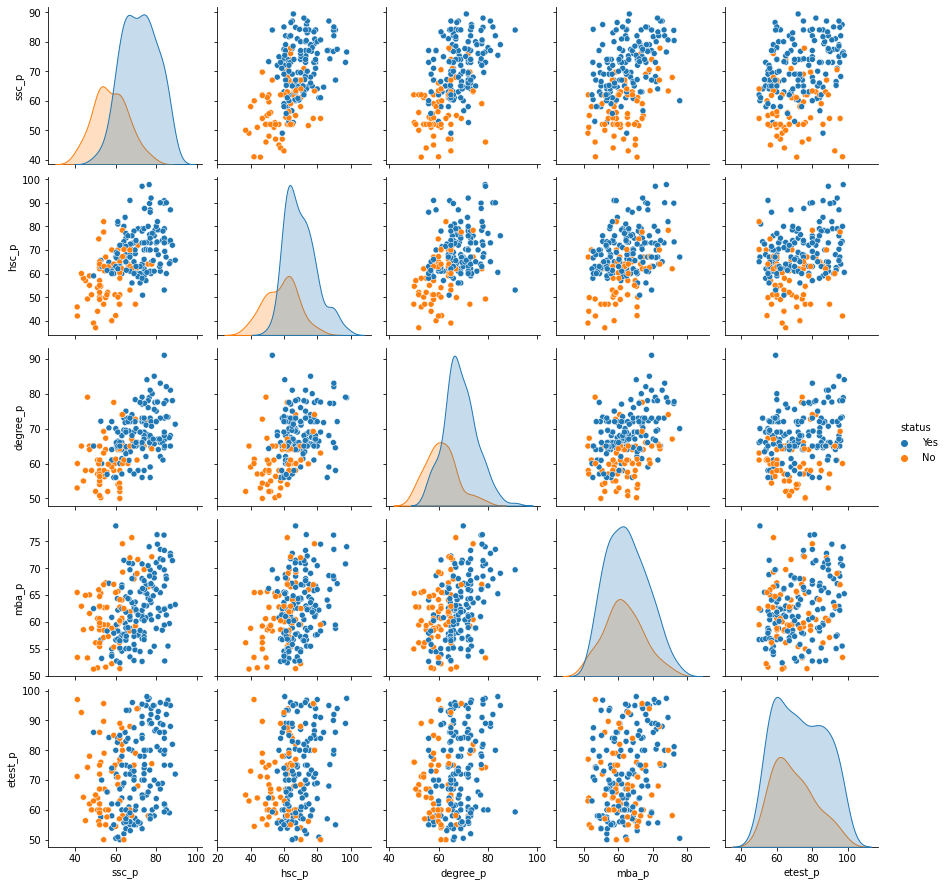

In [15]:
sns.pairplot(dados,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

# Análise das variáveis categóricas

## workex

<AxesSubplot:xlabel='workex', ylabel='count'>

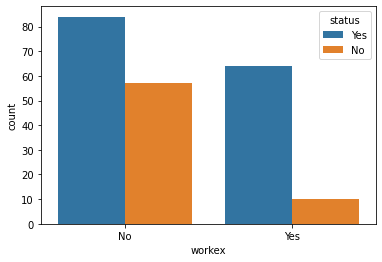

In [16]:
sns.countplot(data=dados, x='workex', hue='status')

Proporocionalmente, há mais candidatos contratados com workex

<AxesSubplot:xlabel='hsc_p', ylabel='status'>

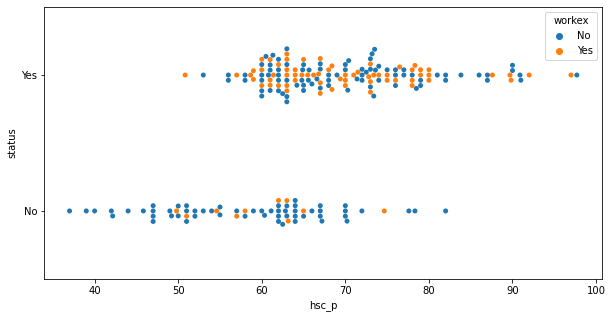

In [17]:
plt.figure(figsize=(10,5))

sns.swarmplot(data=dados, x='hsc_p', y='status', hue='workex')

## specialisation

<AxesSubplot:xlabel='degree_p', ylabel='status'>

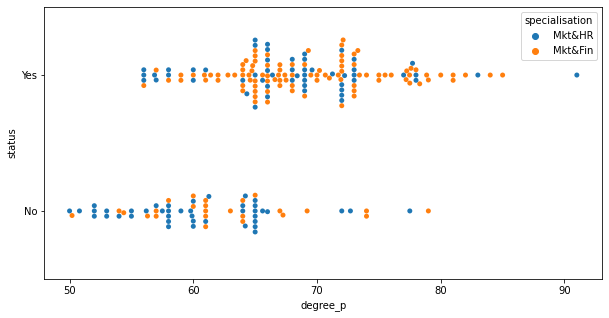

In [18]:
plt.figure(figsize=(10,5))

sns.swarmplot(data=dados, x='degree_p', y='status', hue='specialisation')

<AxesSubplot:xlabel='specialisation', ylabel='salary'>

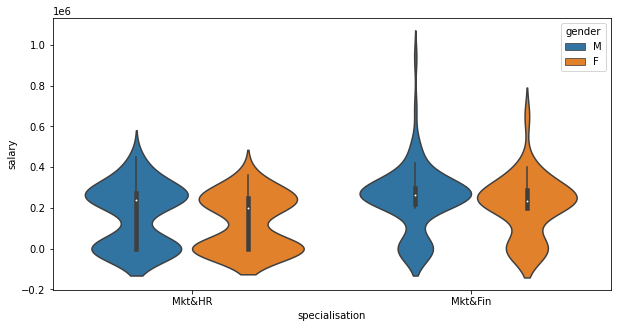

In [19]:
plt.figure(figsize=(10,5))

sns.violinplot(data=dados, y='salary', x='specialisation', hue='gender')

Leve diferença na remuneração entre homens e mulheres

<AxesSubplot:xlabel='specialisation', ylabel='hsc_p'>

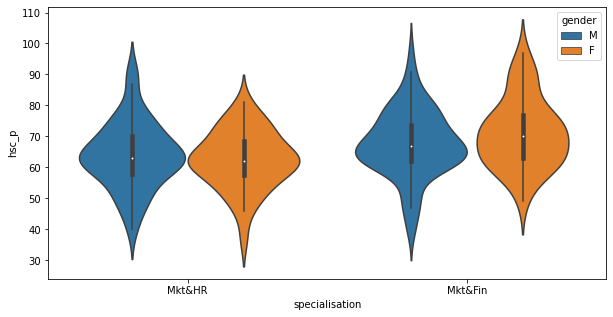

In [20]:
plt.figure(figsize=(10,5))

sns.violinplot(data=dados, y='hsc_p', x='specialisation', hue='gender')

<AxesSubplot:xlabel='hsc_p', ylabel='status'>

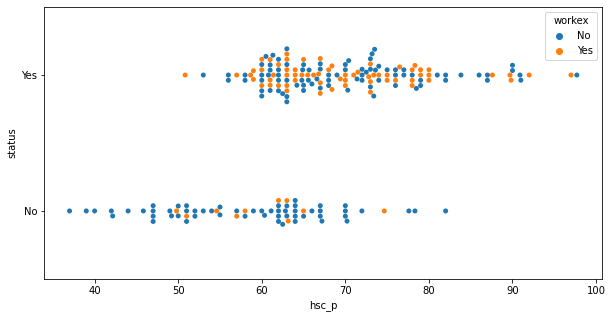

In [21]:
plt.figure(figsize=(10,5))

sns.swarmplot(data=dados, x='hsc_p', y='status', hue='workex')

# LabelEncoder + OneHotEncoding

Transformar variáveis categóricas em variáveis numéricas

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [24]:
print(dados.hsc_s.unique())
print(dados.degree_t.unique())
print(dados.specialisation.unique())
print(dados.ssc_b.unique())
print(dados.hsc_b.unique())

['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']
['Others' 'Central']
['Others' 'Central']


In [25]:
cols_encode = ['gender','ssc_b','hsc_b','workex','specialisation','status']
cols_one_hot_encoding = ['hsc_s','degree_t']

In [26]:
label_encoder = LabelEncoder()

dados_encode = dados.copy()

for col in cols_encode:
    dados_encode[col] = label_encoder.fit_transform(dados_encode[col])

In [27]:
dados_encode

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,Commerce,73.00,Comm&Mgmt,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,Commerce,58.00,Comm&Mgmt,0,70.0,1,60.23,1,204000.0


In [28]:
dummy_1 = pd.get_dummies(dados_encode[cols_one_hot_encoding[0]], prefix='dummy')
dummy_2= pd.get_dummies(dados_encode[cols_one_hot_encoding[1]], prefix='dummy')


dummy_df = pd.concat([dados_encode, dummy_1, dummy_2], axis=1)

In [29]:
dummy_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,1,0,0,1,0,0
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,...,1,59.43,0,0.0,0,0,1,0,0,1
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,...,0,74.49,1,400000.0,0,1,0,1,0,0
211,212,1,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,...,0,53.62,1,275000.0,0,0,1,0,0,1
212,213,1,67.00,1,67.00,1,Commerce,73.00,Comm&Mgmt,1,...,0,69.72,1,295000.0,0,1,0,1,0,0
213,214,0,74.00,1,66.00,1,Commerce,58.00,Comm&Mgmt,0,...,1,60.23,1,204000.0,0,1,0,1,0,0


In [30]:
dados_final = dummy_df.drop(columns=cols_one_hot_encoding)
dados_final.drop(columns=['salary'], inplace=True)

dados_final

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
211,212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
212,213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
213,214,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


# Análise de correlação

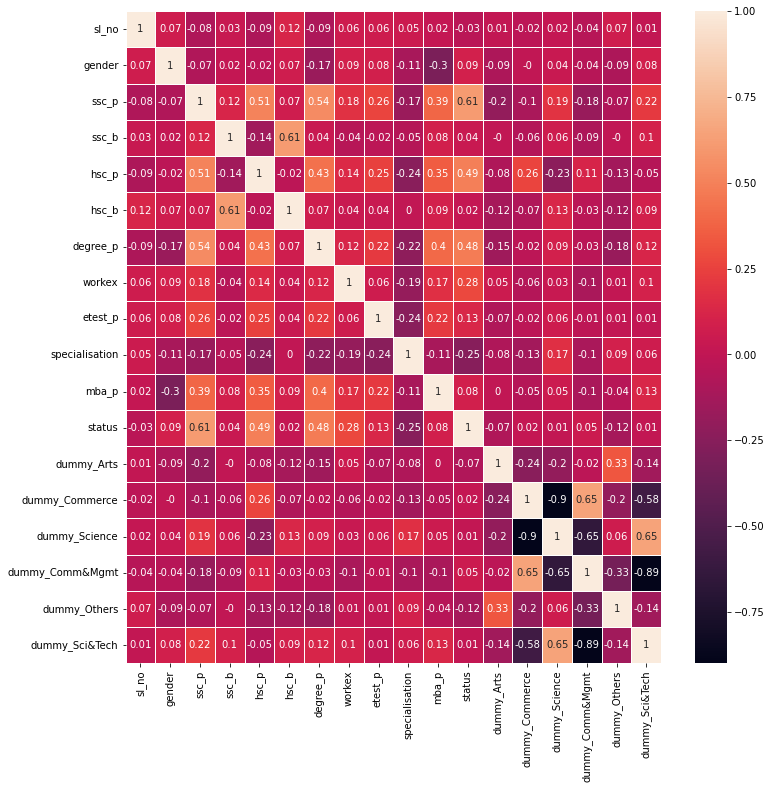

In [31]:
corr_matrix = dados_final.corr().round(2)

fig,ax = plt.subplots(figsize=(12,12))

sns.heatmap(data=corr_matrix, annot=True, linewidths=.5, ax=ax)

plt.show()

Variáveis selecionadas:

- ssc_p
- hsc_p
- degree_p
- workex
- specialisation

# Criando modelo

In [47]:
x = dados_final[['ssc_p','hsc_p','degree_p','workex','specialisation', 'mba_p']]
y = dados_final['status']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=7) 

In [49]:
x_train.shape

(161, 6)

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Escalonamento/padronização dos dados

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [57]:
scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [58]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10): #range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(x_train_scaled, y_train) #treinando o algoritmo para encontrar o erro
    y_pred_i = knn.predict(x_test_scaled) #armazenando as previsões
    error.append(np.mean(y_pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

Text(0, 0.5, 'Mean Error')

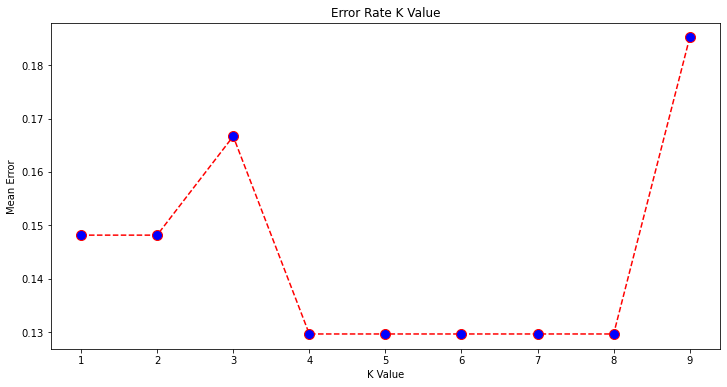

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

K = 6

In [62]:
knn = KNeighborsClassifier(6)

knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [63]:
y_pred_knn = knn.predict(x_test_scaled)

y_pred_knn

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

### Validação

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

<Figure size 432x432 with 0 Axes>

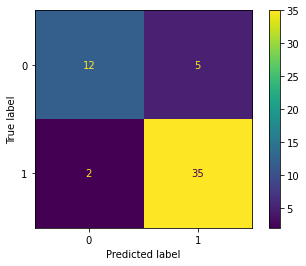

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.88      0.95      0.91        37

    accuracy                           0.87        54
   macro avg       0.87      0.83      0.84        54
weighted avg       0.87      0.87      0.87        54



In [69]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)

fig = plt.figure(figsize=(6,6))

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(values_format='d')

plt.show()

print(classification_report(y_test, y_pred_knn))

## SVM

In [70]:
from sklearn.svm import LinearSVC

In [72]:
svm = LinearSVC(C=1)

svm.fit(x_train_scaled, y_train)

y_pred_svm = svm.predict(x_test_scaled)

<Figure size 432x432 with 0 Axes>

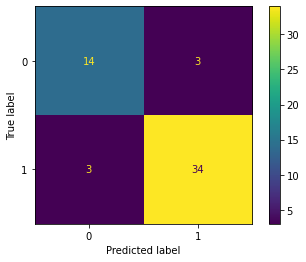

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.92      0.92      0.92        37

    accuracy                           0.89        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.89      0.89      0.89        54



In [73]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)

fig = plt.figure(figsize=(6,6))

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(values_format='d')

plt.show()

print(classification_report(y_test, y_pred_svm))

## ROC/AOC

In [74]:
from sklearn.metrics import roc_curve, auc

In [76]:
y_prob_knn = knn.predict_proba(x_test_scaled)[:,1]

y_prob_knn

array([1.        , 0.33333333, 1.        , 0.66666667, 0.83333333,
       0.33333333, 0.83333333, 1.        , 0.83333333, 1.        ,
       1.        , 1.        , 0.83333333, 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.33333333, 1.        ,
       1.        , 0.16666667, 0.33333333, 0.66666667, 1.        ,
       0.66666667, 0.66666667, 1.        , 0.16666667, 1.        ,
       0.83333333, 0.16666667, 1.        , 1.        , 1.        ,
       0.16666667, 0.83333333, 0.5       , 1.        , 0.33333333,
       1.        , 0.66666667, 1.        , 0.66666667, 1.        ,
       0.16666667, 1.        , 1.        , 0.83333333, 1.        ,
       0.16666667, 1.        , 0.66666667, 0.83333333])

In [78]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_prob_knn)

In [84]:
roc_auc = auc(fp_rate, tp_rate)

print(f'Área abaixo da curva: {roc_auc}')

Área abaixo da curva: 0.8640699523052464


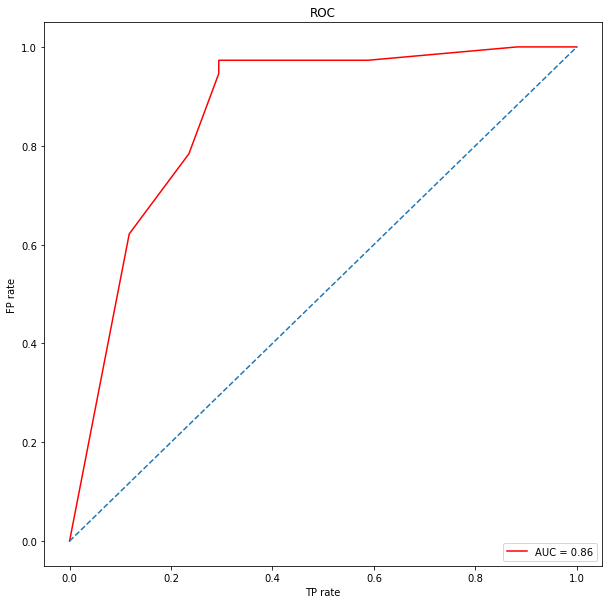

In [85]:
plt.figure(figsize=(10,10))

plt.title('ROC')
plt.plot(fp_rate, tp_rate, color='red', label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0, 1], linestyle='--')
plt.axis('tight')
plt.xlabel('TP rate')
plt.ylabel('FP rate')

plt.show()